<a href="https://colab.research.google.com/github/ambideXtrous9/Machine-Learning-Assignments/blob/main/214161006_214161011_Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 527 Machine Learning Lab
## Assignment 08
-----------------------------------------
214161006 Pathak Sanchit Vivekanand

214161011 Sushovan Saha

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.image as img
import matplotlib.pyplot as plt

# Q1

In [ ]:
df_train = pd.read_csv('Train_file.csv', names=[i for i in range(61)])
X_train = df_train.drop(columns=[60])
y_train = df_train[60]

In [ ]:
X_train0 = X_train[y_train==0]
X_train0.shape

(43090, 60)

In [ ]:
X_train1 = X_train[y_train==1]
X_train1.shape

(42970, 60)

## Part a

In [ ]:
#Compute mu0, mu1, C0, C1
mu0 = np.mean(X_train0, axis=0).to_numpy().reshape(-1,1)
mu1 = np.mean(X_train1, axis=0).to_numpy().reshape(-1,1)
C0 = np.cov((X_train0-mu0.T).T)
C1 = np.cov((X_train1-mu1.T).T)

## Part b

In [ ]:
C0.shape

(60, 60)

In [ ]:
#Define discriminant function g(x)
def g(x, mu0, mu1, C0, C1, p0, p1):
    
    C0_inv = np.linalg.pinv(C0)
    C1_inv = np.linalg.pinv(C1)
    g1 = math.log(p1/p0)- 0.5*(np.matmul(np.matmul(mu1.T,C1_inv),mu1) - np.matmul(np.matmul(mu0.T,C0_inv),mu0))- 0.5*(math.log(np.linalg.det(C1)/np.linalg.det(C0)))+ np.matmul(x.T, np.matmul(C1_inv,mu1)-np.matmul(C0_inv,mu0))- 0.5*(np.matmul(x.T, np.matmul(C1_inv-C0_inv, x)))
    return g1

#Get label y(x)
def get_label(x, mu0, mu1, C0, C1, p0, p1):
    return 1 if g(x, mu0, mu1, C0, C1, p0, p1)>=0 else 0

## Part c

In [ ]:
df_test = pd.read_csv('Test_file.csv', names=[i for i in range(61)])
X_test = df_test.drop(columns=[60])
y_test = df_test[60]
X_test0 = X_test[y_test==0].to_numpy()
y_test0 = y_test[y_test==0].to_numpy()
print(X_test0.shape)
X_test1 = X_test[y_test==1].to_numpy()
y_test1 = y_test[y_test==1].to_numpy()
print(X_test1.shape)

(10698, 60)
(10818, 60)


In [ ]:
p0 = X_train0.shape[0]/X_train.shape[0]
p1 = X_train1.shape[0]/X_train.shape[0]

In [ ]:
#prediction for class 0
pred0 = [get_label(X_test0[i,:], mu0, mu1, C0, C1, p0, p1) for i in range(X_test0.shape[0])]

In [ ]:
#prediction for class 1
pred1 = [get_label(X_test1[i,:], mu0, mu1, C0, C1, p0, p1) for i in range(X_test1.shape[0])]

In [ ]:
#Accuracy mearsures
n_crrt0 = np.sum((pred0==y_test0))
n_crrt1 = np.sum((pred1==y_test1))
rho0 = n_crrt0/X_test0.shape[0]
print("rho0 = ",rho0)
rho1 = n_crrt1/X_test1.shape[0]
print("rho1 = ",rho1)
rho = (n_crrt0+n_crrt1)/X_test.shape[0]
print("rho = ",rho)

rho0 =  0.859412974387736
rho1 =  0.951007579959327
rho =  0.9054656999442275


# Q2.

### a) Load the two datasets MFCC_N.npy and MFCC_S.npy into arrays N and S respectively. Use the python function np.load( filename )

In [ ]:
N = np.load('MFCC_N.npy')
S = np.load('MFCC_S.npy')

In [ ]:
print(S.shape)
print(N.shape)

(5000, 60)
(5000, 60)


### b) Compute centroids (𝑚n,𝑚s) and covariance matrices (𝐶n, 𝐶s) of both arrays.

In [ ]:
N_mean = np.mean(N,axis=0).reshape(1,60)
S_mean = np.mean(S,axis=0).reshape(1,60)

In [ ]:
N_var = np.var(N,axis=0).reshape(1,60)
S_var = np.var(S,axis=0).reshape(1,60)

### c) Compute the optimal direction vector 𝜔ෝ (unit vector) for LDA. 

In [ ]:
def SW(X,m):    
    return np.cov((X - m).T)

In [ ]:
C0 = SW(N,N_mean)
C1 = SW(S,S_mean)

In [ ]:
Sw = C1 + C0
print(Sw.shape)

(60, 60)


In [ ]:
w = np.matmul(np.linalg.pinv(Sw),(S_mean-N_mean).T)
print(w.shape)
w = (w/np.linalg.norm(w)).reshape(1,60)

(60, 1)


In [ ]:
w.shape

(1, 60)

In [ ]:
w

array([[ 0.05013247,  0.02059452,  0.01147756,  0.00076913, -0.020969  ,
        -0.03169092, -0.02056796, -0.05929642,  0.00243547, -0.02406555,
        -0.06233557, -0.02164728, -0.03385221, -0.01278151, -0.05648473,
         0.04961829, -0.08909274,  0.03341232, -0.05157907,  0.03478414,
        -0.00554002, -0.00273071,  0.00941994, -0.02006019, -0.0062669 ,
         0.00815022,  0.00302164,  0.01945601,  0.01438128,  0.04405062,
        -0.00389541, -0.00458378,  0.05268316, -0.03480734,  0.01620402,
         0.01436791,  0.00345099, -0.0043939 , -0.00400961,  0.01123724,
         0.29476108,  0.13029349,  0.06464455, -0.02897804, -0.14512398,
        -0.21297685, -0.11160177, -0.23896296, -0.02695199, -0.10490741,
        -0.32085395, -0.1062125 , -0.19659521, -0.11972019, -0.3170081 ,
         0.25783691, -0.49174749,  0.13488922, -0.28860523,  0.15750495]])

In [ ]:
zN = np.matmul(w,N.T).T
zS = np.matmul(w,S.T).T

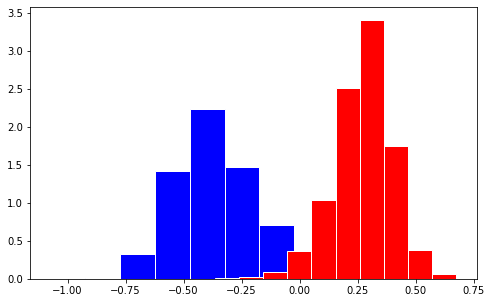

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(zN, density=True,color = "blue", ec="white")
plt.hist(zS, density=True,color = "red", ec="white")
plt.show()

# Q3.

In [ ]:
image1 = img.imread('KMeans_Seg_Input_Image_1.jpg')
image2 = img.imread('KMeans_Seg_Input_Image_2.jpg')
image3 = img.imread('KMeans_Seg_Input_Image_3.jpg')
image4 = img.imread('KMeans_Seg_Input_Image_4.jpg')
image5 = img.imread('KMeans_Seg_Input_Image_5.jpg')

In [ ]:
#all 5 images are of same shape
sh = image1.shape
print("original shape = ", sh)

original shape =  (321, 481, 3)


In [ ]:
image_f1 = image1.reshape(-1,3)
image_f2 = image2.reshape(-1,3)
image_f3 = image3.reshape(-1,3)
image_f4 = image4.reshape(-1,3)
image_f5 = image5.reshape(-1,3)

In [ ]:
print("flatten shape = ", image_f1.shape)

flatten shape =  (154401, 3)


In [ ]:
def KMeansClustering(X,k,tol=1e-1):
    
    #no of datapoints/pixels - m
    m = X.shape[0]
    
    #form Sum of Squared Error (SSE) - our stopping criteria
    SSE = 0
    
    #initialize random centroids - random inside the feature space
    centroids = np.random.randint(low=0, high=256, size=(k,3))
    #cen_idx = np.random.randint(low=0, high=m, size=(k))
    #centroids = X[cen_idx]
    
    #initialize cluster group array
    cluster_no = np.zeros((m))
    
    for i in range(X.shape[0]):
        #find euclidean dist of each points from all centroids
        dist = (X[i,:] - centroids)**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        #set points to cluster groups
        cluster_no[i] = np.argmin(dist)
        #update SSE
        SSE = SSE + np.linalg.norm(X[i,:]-centroids[cluster_no[i].astype(int),:])**2
    
    SSE_new = 0
    
    #repeat this till convergence
    while np.abs(SSE_new-SSE)>tol:
        SSE = SSE_new
        SSE_new = 0
        #find new cluster centroids
        for i in range(k):
            #get datapoints of each cluster (shape: (mi,3))
            data = X[cluster_no==i]
            #find avg to get centorid for that cluster
            centroids[i,:] = np.mean(data, axis=0)
        
        #reassign datapoints to new clusters
        for j in range(X.shape[0]):
            #find euclidean dist of each points from all centroids
            dist = (X[j,:] - centroids)**2
            dist = np.sum(dist, axis=1)
            dist = np.sqrt(dist)
            #set points to cluster groups
            cluster_no[j] = np.argmin(dist).astype(int)
            #update SSE
            SSE_new = SSE_new + np.linalg.norm(X[j,:]-centroids[cluster_no[j].astype(int),:])**2
    return centroids, cluster_no.astype(int)

### Image 1: k=3

C:\Users\sanch\miniconda3\envs\ML_Lab\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sanch\miniconda3\envs\ML_Lab\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[[100  90  74]
 [ 54  50  41]
 [145 152 155]]


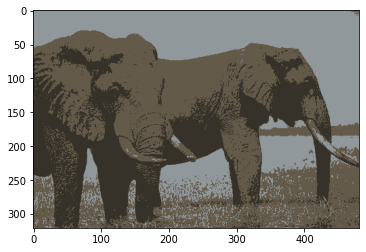

In [ ]:
centroids, cluster_no = KMeansClustering(image_f1,3)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f1
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))

### Image 2: k=5

[[ 98 109 115]
 [136 156 171]
 [174 202 217]
 [226 245 249]
 [ 66  75  75]]


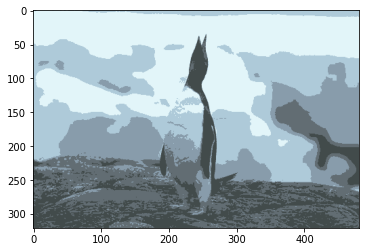

In [ ]:
centroids, cluster_no = KMeansClustering(image_f2,5)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f1
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))

### Image 2: k=3

[[217 238 244]
 [152 176 192]
 [ 84  94  97]]


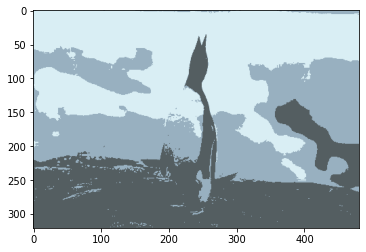

In [ ]:
centroids, cluster_no = KMeansClustering(image_f2,3)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f1
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))

### Image 3: k=2

[[ 37  43  32]
 [103 108  71]]


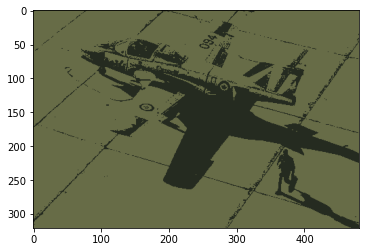

In [ ]:
centroids, cluster_no = KMeansClustering(image_f3,2)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f3
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))

### Image 4: k=3

[[237 193  33]
 [136  81  25]
 [ 35  26  16]]


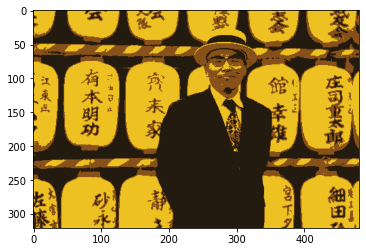

In [ ]:
centroids, cluster_no = KMeansClustering(image_f4,3)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f3
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))

### Image 4: k=5

[[118  63  20]
 [199 145  22]
 [248 205  24]
 [219 205 176]
 [ 32  25  16]]


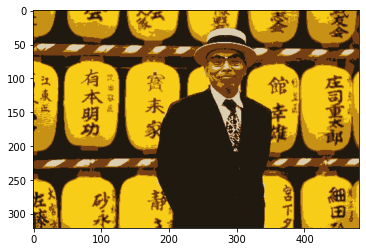

In [ ]:
centroids, cluster_no = KMeansClustering(image_f4,5)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f3
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))

### Image 5: k=3

[[149 140 115]
 [129 120  97]
 [ 71  63  38]]


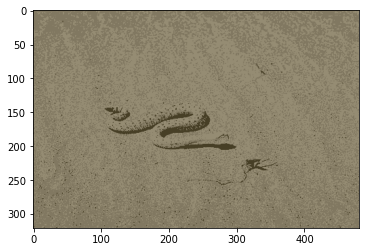

In [ ]:
centroids, cluster_no = KMeansClustering(image_f5,3,tol=1e-8)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f5
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))

### Image 5: k=4

[[         71          63          38]
 [        139         130         106]
 [-2147483648 -2147483648 -2147483648]
 [-2147483648 -2147483648 -2147483648]]


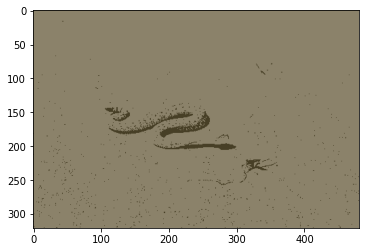

In [ ]:
centroids, cluster_no = KMeansClustering(image_f5,4,tol=1e-8)

#print centroids
print(centroids)

#Replace each pixel with nearest cluster
X_clustered = image_f5
for i in range(X_clustered.shape[0]):
    X_clustered[i,:] = centroids[cluster_no[i],:]

#plot the image
plt.figure()
plt.imshow(X_clustered.reshape(sh))